PROBLEM SET 1.1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("classic")
plt.style.use("../pyplot.mplstyle")

In [2]:
def visualize(ex: np.ndarray, hy: np.ndarray) -> None:
    """Data visualization with Matplotlib"""

    fig, (ax1, ax2) = plt.subplots(2, sharex=False, gridspec_kw={"hspace": 0.2})
    fig.suptitle(r"FDTD simulation of a pulse in free space after 100 time steps")
    ax1.plot(ex, "k", lw=1)
    ax1.text(100, 0.5, "T = 100", horizontalalignment="center")
    ax1.set(xlim=(0, 200), ylim=(-1.2, 1.2), ylabel=r"E$_x$")
    ax1.set(xticks=range(0, 220, 20), yticks=np.arange(-1, 1.2, 1))
    ax2.plot(hy, "k", lw=1)
    ax2.set(xlim=(0, 200), ylim=(-1.2, 1.2), xlabel=r"FDTD cells", ylabel=r"H$_y$")
    ax2.set(xticks=range(0, 220, 20), yticks=np.arange(-1, 1.2, 1))
    plt.subplots_adjust(bottom=0.2, hspace=0.45)
    plt.show()

In [3]:
def gaussian(t: int, t0: int = 40, sigma: float = 12) -> float:
    """
    Gaussian pulse source

    :param int t: an integer counter that serves as the temporal index
    :param int t0: time step at which gaussian function is maximum, default 40
    :param float sigma: width of the gaussian pulse, default 12

    :return: gaussian pulse
    :rtype: float

    """

    return np.exp(-0.5 * ((t - t0) / sigma) ** 2)

1. Get the program fd1d_1_1.py running. What happens when the pulse hits the end of the array? Why?

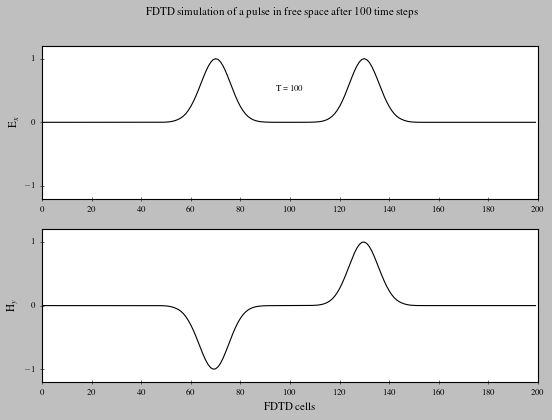

In [4]:
def simulate(ke: int, ex: np.ndarray, hy: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Finite-difference time-domain method

    :param int ke: number of electric and magnetic field nodes
    :param np.ndarray ex: electric field oriented in the x direction
    :param np.ndarray hy: magnetic field oriented in the y direction

    :return: ex, hy: electric and magnetic field
    :rtype: tuple[np.ndarray, np.ndarray]

    """

    kc: int = ke // 2
    nsteps: int = 100

    # FDTD simulation loop
    for t in range(1, nsteps + 1):

        # calculate the Ex field
        ex[1:ke] = ex[1:ke] + 0.5 * (hy[0:ke-1] - hy[1:ke])

        # put a Gaussian pulse in the middle
        ex[kc] = gaussian(t, 40, 12)

        # calculate the Hy field
        hy[0:ke-1] = hy[0:ke-1] + 0.5 * (ex[0:ke-1] - ex[1:ke])

    return ex, hy


def main():
    """Main function"""

    ke = 200
    ex = np.zeros(ke, dtype=np.float64)
    hy = np.zeros(ke, dtype=np.float64)

    ex, hy = simulate(ke, ex, hy)
    visualize(ex, hy)


if __name__ == "__main__":
    main()

2. Modify the program so it has two sources, one at kc - 20 and one at kc + 20. (Notice that kc is the center of the problem space.) What happens when the pulses meet? Explain this from basic electromagnetic (EM) theory.

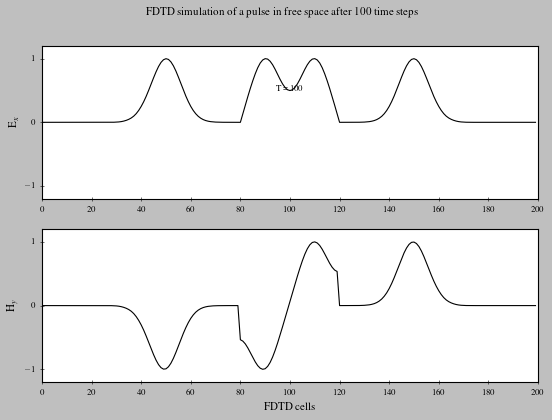

In [5]:
def simulate(ke: int, ex: np.ndarray, hy: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Finite-difference time-domain method

    :param int ke: number of electric and magnetic field nodes
    :param np.ndarray ex: electric field oriented in the x direction
    :param np.ndarray hy: magnetic field oriented in the y direction

    :return: ex, hy: electric and magnetic field
    :rtype: tuple[np.ndarray, np.ndarray]

    """

    kc: int = ke // 2
    nsteps: int = 100

    # FDTD simulation loop
    for t in range(1, nsteps + 1):

        # calculate the Ex field
        ex[1:ke] = ex[1:ke] + 0.5 * (hy[0:ke-1] - hy[1:ke])

        # put a Gaussian pulse in the middle
        ex[kc-20] = gaussian(t, 40, 12)
        ex[kc+20] = gaussian(t, 40, 12)

        # calculate the Hy field
        hy[0:ke-1] = hy[0:ke-1] + 0.5 * (ex[0:ke-1] - ex[1:ke])

    return ex, hy


def main():
    """Main function"""

    ke = 200
    ex = np.zeros(ke, dtype=np.float64)
    hy = np.zeros(ke, dtype=np.float64)

    ex, hy = simulate(ke, ex, hy)
    visualize(ex, hy)


if __name__ == "__main__":
    main()

3. Instead of E_x as the source, use H_y at k = kc as the source. What difference does it make? Try a two-point magnetic source at kc - 1 and kc such that hy[kc - 1] = - hy[kc]. What does this look like? To what does it correspond physically?

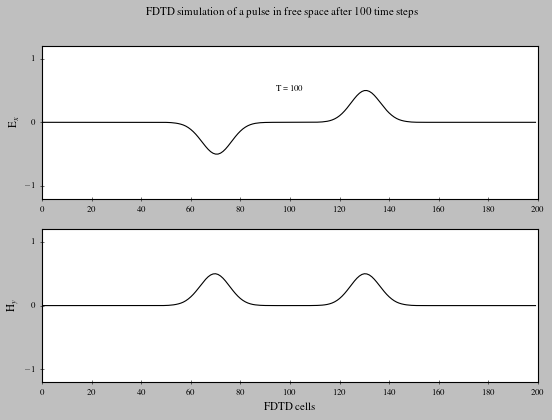

In [6]:
def simulate(ke: int, ex: np.ndarray, hy: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Finite-difference time-domain method

    :param int ke: number of electric and magnetic field nodes
    :param np.ndarray ex: electric field oriented in the x direction
    :param np.ndarray hy: magnetic field oriented in the y direction

    :return: ex, hy: electric and magnetic field
    :rtype: tuple[np.ndarray, np.ndarray]

    """

    kc: int = ke // 2
    nsteps: int = 100

    # FDTD simulation loop
    for t in range(1, nsteps + 1):

        # calculate the Ex field
        ex[1:ke] = ex[1:ke] + 0.5 * (hy[0:ke-1] - hy[1:ke])

        # put a Gaussian pulse in the middle
        hy[kc] = gaussian(t, 40, 12)

        # calculate the Hy field
        hy[0:ke-1] = hy[0:ke-1] + 0.5 * (ex[0:ke-1] - ex[1:ke])

    return ex, hy


def main():
    """Main function"""

    ke = 200
    ex = np.zeros(ke, dtype=np.float64)
    hy = np.zeros(ke, dtype=np.float64)

    ex, hy = simulate(ke, ex, hy)
    visualize(ex, hy)


if __name__ == "__main__":
    main()

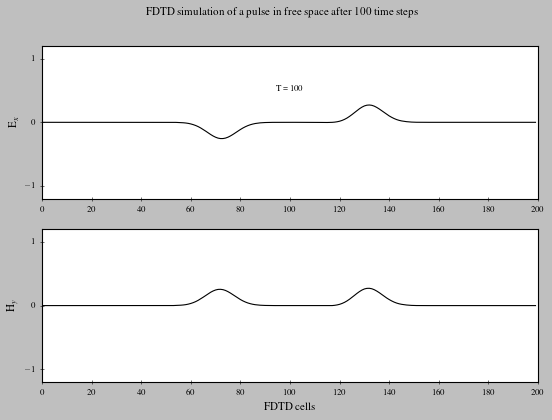

In [7]:
def simulate(ke: int, ex: np.ndarray, hy: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Finite-difference time-domain method

    :param int ke: number of electric and magnetic field nodes
    :param np.ndarray ex: electric field oriented in the x direction
    :param np.ndarray hy: magnetic field oriented in the y direction

    :return: ex, hy: electric and magnetic field
    :rtype: tuple[np.ndarray, np.ndarray]

    """

    kc: int = ke // 2
    nsteps: int = 100

    # FDTD simulation loop
    for t in range(1, nsteps + 1):

        # calculate the Ex field
        ex[1:ke] = ex[1:ke] + 0.5 * (hy[0:ke-1] - hy[1:ke])

        # put a Gaussian pulse in the middle
        hy[kc-1] = -hy[kc]
        hy[kc] = gaussian(t, 40, 12)

        # calculate the Hy field
        hy[0:ke-1] = hy[0:ke-1] + 0.5 * (ex[0:ke-1] - ex[1:ke])

    return ex, hy


def main():
    """Main function"""

    ke = 200
    ex = np.zeros(ke, dtype=np.float64)
    hy = np.zeros(ke, dtype=np.float64)

    ex, hy = simulate(ke, ex, hy)
    visualize(ex, hy)


if __name__ == "__main__":
    main()